## PyTorch: A Framework for Deep Learning

This notebook dives into __how PyTorch stores and manipulates data__ using $n$-dimensional arrays, which are also called tensors. If you have worked with NumPy, the most widely-used scientific computing package in Python, then you will find this section familiar. No matter which framework you use, its tensor class is similar to NumPy's ndarray with a few killer features. First, __GPU is well-supported__ to accelerate the computation whereas NumPy only supports CPU computation. Second, the tensor class supports __automatic differentiation__. These properties make the tensor class suitable for deep learning. 


### Related Readings
* [Chapter 2 of D2L](http://d2l.ai/chapter_preliminaries/index.html) contains some of the preliminary materials we covered here.  The material on automatic differentiation is covered elsewhere.

In [ ]:
# Ensure installation of specific libaries
!pip install celluloid==0.2.0
!pip install d2l==0.14.3
!pip install IPython==7.16.1
!pip install numpy==1.19.5
!pip install matplotlib==3.3.4
!pip install torch==1.8.1+cu101
!pip install torchvision==0.9.1+cu101
!pip install scikit-learn==0.24.1
!pip install seaborn==0.11.1

In [1]:
# Although it’s called PyTorch, we should import torch instead of pytorch
import torch

### Data Manipulation

A tensor represents a (possibly multi-dimensional) array of numerical values. With one axis, a tensor corresponds (in math) to a vector. With two axes, a tensor corresponds to a matrix. Tensors with more than two axes do not have special mathematical names.

To start, we can use arange to create a row vector x containing the first 12 integers starting with 0, though they are created as floats by default. Unless otherwise specified, a new tensor will be stored in main memory and designated for CPU-based computation.

In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

We can access a tensor’s shape (the length along each axis) by inspecting its shape property.


In [3]:
x.shape

torch.Size([12])

We can invoke the `reshape` function to transform our tensor, `x`,
from a row vector with shape (12,) to a matrix with shape (3, 4).

In [4]:
x_reshaped = x.reshape(3, 4)
x_reshaped

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

If our target shape is a matrix with shape (height, width), then after we know the width, the height is given implicitly. Fortunately, tensors can automatically work out one dimension given the rest. We invoke this capability by placing `-1` for the dimension that we would like tensors to automatically infer. In our case, instead of calling `x.reshape(3, 4)`, we could have equivalently called `x.reshape(-1, 4)` or `x.reshape(3, -1)`.

Typically, we will want our matrices initialized either with zeros, ones, some other constants, or numbers randomly sampled from a specific distribution. We can create a tensor representing a tensor with all elements set to 0 and a shape of (2, 3, 4) as follows:


In [5]:
zeros_tensor = torch.zeros((2, 3, 4))
zeros_tensor

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Similarly, we can create tensors with each element set to 1 as follows:


In [6]:
ones_tensor = torch.ones((2, 3, 4))
ones_tensor

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

Often, we want to randomly sample the values for each element in a tensor from some probability distribution. For example, when we construct arrays to serve as parameters in a neural network, we will typically initialize their values randomly. The following snippet creates a tensor with shape (3, 4). Each of its elements is randomly sampled from a standard Gaussian (normal) distribution with a mean of 0 and a standard deviation of 1.

In [7]:
x = torch.randn(3, 4)
x

tensor([[-0.2214, -0.6073,  0.2648, -0.7102],
        [-0.9860,  1.4167, -2.1402, -1.3381],
        [ 0.0731, -0.2431,  0.1478,  0.6041]])

We can access the dimension of a tensor by the `.shape` attribute. We can also query its size with `numel()`, which is equal to the product of the components of the shape. In addition, `.dtype` tells the data type of the stored values.

In [8]:
x.shape, x.numel(), x.dtype

(torch.Size([3, 4]), 12, torch.float32)

#### Indexing and Slicing

Just as in any other Python array, elements in a tensor can be accessed by index.

In [9]:
x, x[-1], x[1:3]

(tensor([[-0.2214, -0.6073,  0.2648, -0.7102],
         [-0.9860,  1.4167, -2.1402, -1.3381],
         [ 0.0731, -0.2431,  0.1478,  0.6041]]),
 tensor([ 0.0731, -0.2431,  0.1478,  0.6041]),
 tensor([[-0.9860,  1.4167, -2.1402, -1.3381],
         [ 0.0731, -0.2431,  0.1478,  0.6041]]))

Beyond reading, we can also write elements of a matrix by specifying indices.


In [10]:
x[1, 2] = 9
x

tensor([[-0.2214, -0.6073,  0.2648, -0.7102],
        [-0.9860,  1.4167,  9.0000, -1.3381],
        [ 0.0731, -0.2431,  0.1478,  0.6041]])

#### Operations 

The common standard arithmetic operators
(`+`, `-`, `*`, `/`, and `**`)
have all been *lifted* to elementwise operations
for any identically-shaped tensors of arbitrary shape.
We can call elementwise operations on any two tensors of the same shape.
In the following example, we use commas to formulate a 5-element tuple,
where each element is the result of an elementwise operation.


In [11]:
x = torch.tensor([1.0, 2.0, 4.0, 8.0])
y = torch.tensor([2.0, 2.0, 2.0, 2.0])

# Sum, difference, element-wise multiplication, division, exponentiation (operator **)
x + y, x - y, x * y, x / y, x ** y  

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

#### Conversion to Other Python Objects

Converting to a NumPy tensor, or vice versa, is easy.
The converted result does not share memory.
This minor inconvenience is actually quite important:
when you perform operations on the CPU or on GPUs,
you do not want to halt computation, waiting to see
whether the NumPy package of Python might want to be doing something else
with the same chunk of memory.


In [12]:
A = x.numpy()
B = torch.tensor(A)

type(A), type(B)

(numpy.ndarray, torch.Tensor)

To convert a size-1 tensor to a Python scalar,
we can invoke the `item` function or Python's built-in functions.


In [13]:
a = torch.tensor([3.5])

a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## Neural Networks with PyTorch

Now, we build, train and validate a Neural Network in [PyTorch](https://pytorch.org/docs/stable/index.html). 

1. <a href="#1">Implementing a neural network with PyTorch</a>       
2. <a href="#2">Loss Functions</a>
3. <a href="#3">Training</a>
4. <a href="#4">Example - Binary Classification</a>

## 1. <a name="1">Implementing a neural network with PyTorch</a>
(<a href="#0">Go to top</a>)

Let's implement a simple neural network with two hidden layers of size 64 using the sequential container (Adding things in sequence). We will have 3 inputs, 2 hidden layers and 1 output layer. Some drop-outs attached to the hidden layers.

In [14]:
import torch
from torch import nn

net = nn.Sequential(
        nn.Linear(3, 64),     # Linear layer-1 with 64 out_features and input size 3
        nn.Tanh(),            # Tanh activation is applied
        nn.Dropout(p=0.4),    # Apply random 40% drop-out to layer_1
        nn.Linear(64, 64),    # Linear layer-2 with 64 units and input size 64  
        nn.Tanh(),            # Tanh activation is applied
        nn.Dropout(p=0.3),    # Apply random 30% drop-out to layer_2
        nn.Linear(64, 1))     # Output layer with single unit

print(net)

Sequential(
  (0): Linear(in_features=3, out_features=64, bias=True)
  (1): Tanh()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=64, out_features=64, bias=True)
  (4): Tanh()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=64, out_features=1, bias=True)
)


The weight parameters of the `Linear` layer in pytorch are initialized with a modified form of the Xavier Initialization. Using these weights as a start, we can later apply optimization such as SGD to train the weights. As a result, using a strategic technique to initialize the weights is crucial. 

Here is a full list of [Initializers](https://pytorch.org/docs/stable/nn.init.html). The commonly used one is called *Xavier initilaization*, which can keep the scale of gradients roughly the same in all the layers. (Here are more technical details of [Xavier initilaization](https://d2l.ai/chapter_multilayer-perceptrons/numerical-stability-and-init.html#xavier-initialization).)

In [15]:
def xavier_init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)

net.apply(xavier_init_weights)

Sequential(
  (0): Linear(in_features=3, out_features=64, bias=True)
  (1): Tanh()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=64, out_features=64, bias=True)
  (4): Tanh()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=64, out_features=1, bias=True)
)

We can easily access them with `net[layer_index]`:

In [16]:
print(net[0])
print(net[1])
print(net[2])
print(net[3])
print(net[4])
print(net[5])
print(net[6])

Linear(in_features=3, out_features=64, bias=True)
Tanh()
Dropout(p=0.4, inplace=False)
Linear(in_features=64, out_features=64, bias=True)
Tanh()
Dropout(p=0.3, inplace=False)
Linear(in_features=64, out_features=1, bias=True)


## 2. <a name="2">Loss Functions</a>
(<a href="#0">Go to top</a>)

We can select [loss functions](https://d2l.ai/chapter_linear-networks/linear-regression.html#loss-function) according to our problem. A full list of supported `Loss` functions in PyTorch are available [here](https://pytorch.org/docs/stable/nn.html#loss-functions). 

Let's go over some popular loss functions and see how to call a built-in loss function:


__Binary Cross-entropy Loss:__ A common used loss function for binary classification. 

```python
loss = nn.BCELoss()
```

__Categorical Cross-entropy Loss:__ A common used loss function for multi-class classification. 

```python
loss = nn.CrossEntropyLoss()
```

__MSE Loss:__ One of the most common loss functions for regression problems. 

```python
loss = nn.MSELoss()
```

## 3. <a name="3">Training</a>
(<a href="#0">Go to top</a>)

`torch.optim` module provides necessary optimization algorithms for neural networks. We can use the following `Optimizers` to train a network using [Stochastic Gradient Descent (SGD)](https://d2l.ai/chapter_optimization/sgd.html) method and learning rate of 0.001.

```python
from torch import optim
optimizer = optim.SGD(net.parameters(), lr=0.001)
```

## 4. <a name="4">Example - Binary Classification</a>
(<a href="#0">Go to top</a>)

In this example, we will train a neural network on a dataset that we randomly generated. We will have two classes and train a neural network to classify them.

In [17]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=750, shuffle=True, random_state=42, noise=0.05, factor=0.3)

First let's plot the simulated dataset.

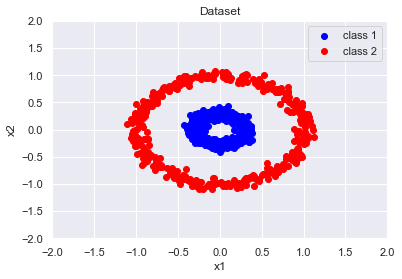

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dataset(X, y, title):
    
    # Activate Seaborn visualization
    sns.set()
    
    # Plot both classes: Class1->Blue, Class2->Red
    plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label="class 1")
    plt.scatter(X[y==0, 0], X[y==0, 1], c='red', label="class 2")
    plt.legend(loc='upper right')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title(title)
    plt.show()
    
plot_dataset(X, y, title="Dataset")

Next, we import the necessary libraries and classes.

In [19]:
import time
from torch.nn import BCELoss

Then, we create the network as below. It will have two hidden layers. Since the data seems easily seperable, we can have a small network (2 hidden layers) with 10 units at each layer.

In [20]:
# Use GPU resource if available, otherwise wil use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = nn.Sequential(nn.Linear(in_features=2, out_features=10),
                    nn.ReLU(),
                    nn.Linear(10, 10),
                    nn.ReLU(),
                    nn.Linear(10, 1),
                    nn.Sigmoid())

Now let's prepare the training set and validation set, and load each of them to a `DataLoader`, respectively.

In [21]:
# Split the dataset into two parts: 80%-20% split
X_train, X_val = X[0:int(len(X)*0.8), :], X[int(len(X)*0.8):, :]
y_train, y_val = y[:int(len(X)*0.8)], y[int(len(X)*0.8):]

# Use PyTorch DataLoaders to load the data in batches
batch_size = 4           # How many samples to use for each weight update 
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                               torch.tensor(y_train, dtype=torch.float32))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)

# Move validation dataset on CPU/GPU device
X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val = torch.tensor(y_val, dtype=torch.float32).to(device)

Before the training, one last thing is to define the hyper-parameters for training.

In [22]:
epochs = 50   # Total number of iterations
lr = 0.01     # Learning rate

# Define the loss. As we used sigmoid in the last layer, we use `nn.BCELoss`.
# Otherwise we could have made use of `nn.BCEWithLogitsLoss`.
loss = BCELoss(reduction='none')

# Define the optimizer, SGD with learning rate
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

Finally, it is the time for training! We will run through the training set 50 times (i.e., epochs) and print training and validation losses at each epoch.

In [23]:
train_losses = []
val_losses = []
for epoch in range(epochs):
    start = time.time()
    training_loss = 0
    # Build a training loop, to train the network
    for idx, (data, target) in enumerate(train_loader):
        # zero the parameter gradients
        optimizer.zero_grad()
        
        data = data.to(device)
        target = target.to(device).view(-1, 1)
        
        output = net(data)
        L = loss(output, target).sum()
        training_loss += L.item()
        L.backward()
        optimizer.step()
    
    # Get validation predictions
    val_predictions = net(X_val)
    # Calculate the validation loss
    val_loss = torch.sum(loss(val_predictions, y_val.view(-1, 1))).item()
    
    # Take the average losses
    training_loss = training_loss / len(y_train)
    val_loss = val_loss / len(y_val)
    
    train_losses.append(training_loss)
    val_losses.append(val_loss)
    
    end = time.time()
    # Print the losses every 10 epochs
    if (epoch == 0) or ((epoch+1)%10 == 0):
        print("Epoch %s. Train_loss %f Validation_loss %f Seconds %f" % \
              (epoch, training_loss, val_loss, end-start))

Epoch 0. Train_loss 0.695089 Validation_loss 0.688003 Seconds 0.061958
Epoch 9. Train_loss 0.031085 Validation_loss 0.025759 Seconds 0.059767
Epoch 19. Train_loss 0.003961 Validation_loss 0.004255 Seconds 0.059017
Epoch 29. Train_loss 0.001862 Validation_loss 0.002165 Seconds 0.055584
Epoch 39. Train_loss 0.001173 Validation_loss 0.001438 Seconds 0.056602
Epoch 49. Train_loss 0.000841 Validation_loss 0.001075 Seconds 0.056984


Let's see the training and validation loss plots below. Losses go down as the training process continues as expected.

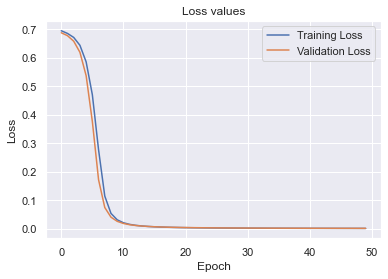

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Loss values")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()